In [2]:
import cv2
import os
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import PIL
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
from torchvision import datasets, models, transforms
import numpy as np

In [5]:
# Carico il modello
model = torch.load("modello")
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

..\dataset\test\people\people_dc.jpeg
there is someone!


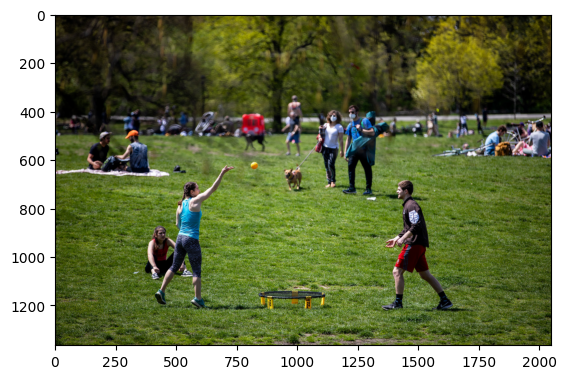

In [13]:
# Copio le transform da applicare all'immagine
input_size = 224
data_transforms = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# Apro l'immagine
parentDir = os.path.join("..","dataset","test")
_, dirs, _ = next(os.walk(parentDir))
category = os.path.join(parentDir, random.choice(dirs))
pic = os.path.join(category,random.choice(os.listdir(category)))
print(pic)

image = Image.open(pic)
x = data_transforms(image)
x.unsqueeze_(0)

y = model(x)
# il primo valore è per la classe nopeole, il secondo per people, vince il max
y = torch.argmax(y)
result = "there is someone!" if y==1 else "there is nobody!"
print(result)

#printo l'immagine per visualizzarla
img = cv2.imread(pic)
toShow = img.copy()
toShow = cv2.cvtColor(toShow, cv2.COLOR_BGR2RGB)
plt.imshow(toShow)

